In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [3]:
# handling missing value
test = resampled_data['1990':].dropna(axis=1)
train = test[:int(0.8*(len(test)))]
valid = test[int(0.8*(len(test))):]

model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [20]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

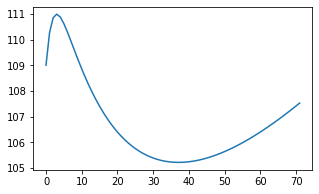

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
l1 = plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


/home/yuntong/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


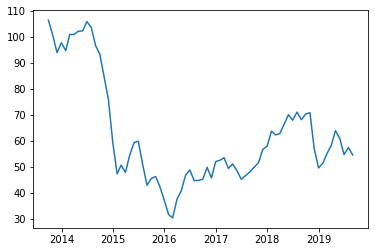

In [6]:
l2 = plt.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])

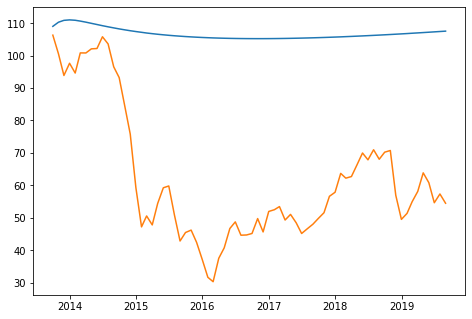

In [22]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**2")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")